In [244]:
import numpy as np
import random
import torch
import torch.nn as nn
import gymnasium as gym
import time
from tqdm import tqdm
import winsound
from torch.distributions import Normal, Categorical
from copy import deepcopy

from FlatOrientation import *
from PPO import *

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

from IPython.display import display, clear_output

sns.set_theme()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Ориентация КА, PPO

## II. Управление с полной обратной связью

### Обучение

In [245]:
env = FlatOrientation(dt=1e-1, t_end=2)

In [246]:
agent = PPO(
    state_dim=3,
    action_dim=1, 
    max_action=25, 
    observable_states=[0, 1, 2],
    gamma=1,
)

# agent.pi_model = torch.load('models/flat_orientation_pi_140.pth')
# agent.v_model = torch.load('models/flat_orientation_v_140.pth')

In [247]:
agent.hjb_lambda = 0
agent.v_lambda = 1

In [248]:
rewards, hjb_history = train_ppo(
    env, 
    agent, 
    episode_n=30, 
    trajectory_n=500, 
    advantage='default',
    hjb=True
)

0: mean reward = -10647121.740089206
1: mean reward = -7326870.604345919
2: mean reward = -4906689.084524003
3: mean reward = -2839065.09504741
4: mean reward = -1420354.1781066754
5: mean reward = -1059415.2352510956
6: mean reward = -533942.1766551019
7: mean reward = -333100.7315685788
8: mean reward = -270488.35409623216
9: mean reward = -231684.87658733357
10: mean reward = -220763.89115402437
11: mean reward = -201717.3743835197
12: mean reward = -183921.6913851588
13: mean reward = -174244.37199114836
14: mean reward = -168775.22036814367
15: mean reward = -173025.0243711799
16: mean reward = -173232.00012656118
17: mean reward = -150384.9915472878
18: mean reward = -152621.54450190067
19: mean reward = -142191.9245846051
20: mean reward = -143806.29884626227
21: mean reward = -138112.2911989645
22: mean reward = -186000.85776289797
23: mean reward = -158895.1140075325
24: mean reward = -138739.24361350684
25: mean reward = -152501.46807474774
26: mean reward = -130075.819875673

In [249]:
history = []
history.extend(rewards)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


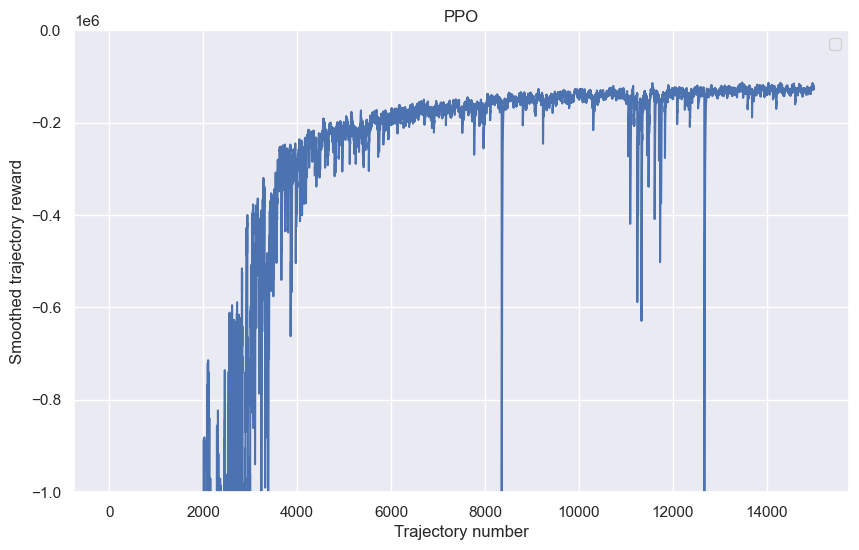

In [252]:
plot_history(history, ylim=[-10**6, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array(1.4981496e+09, dtype=float32)

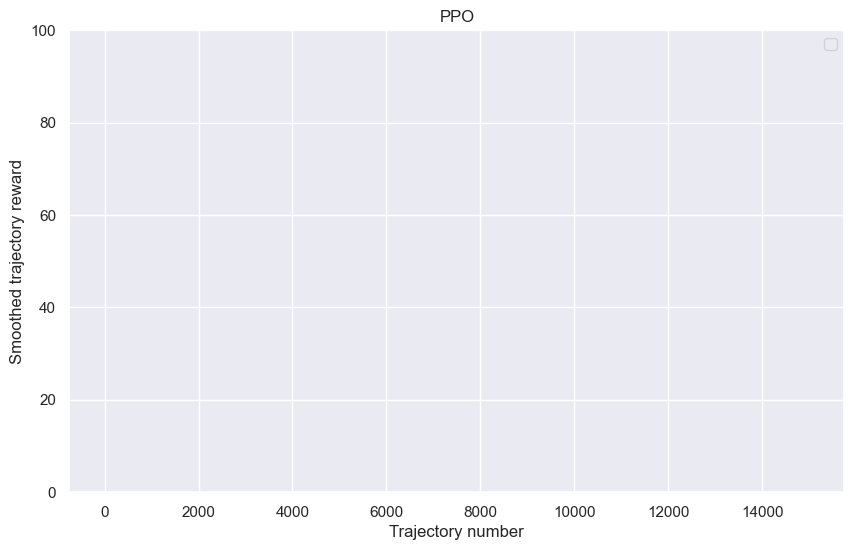

In [253]:
plot_history(hjb_history, ylim=[0, 10**2])
hjb_history[-1]

### Валидация

In [254]:
validation_env = FlatOrientation(dt=1e-3, t_end=3)

In [255]:
class AnaliticalAgent(PPO):
    def __init__(self):
        self.max_action = 1
        self.observable_states = [0, 1, 2]

    def get_action(self, state, prediction=False):
        return [6 * np.pi - 12 * np.pi * state[0]]

In [256]:
validation(validation_env, agent, validation_n=10, prediction=True)

-13127753.731452474

### Управление:

In [257]:
def get_reward(env, agent):
    traj = agent.get_trajectory(env, prediction=True, initial_state=np.array([0, 0, 0]))
    return sum(traj['rewards'])

In [258]:
get_reward(env, agent)

-101089.95888230445

In [259]:
get_reward(env, AnaliticalAgent())

-3782924.1449942905

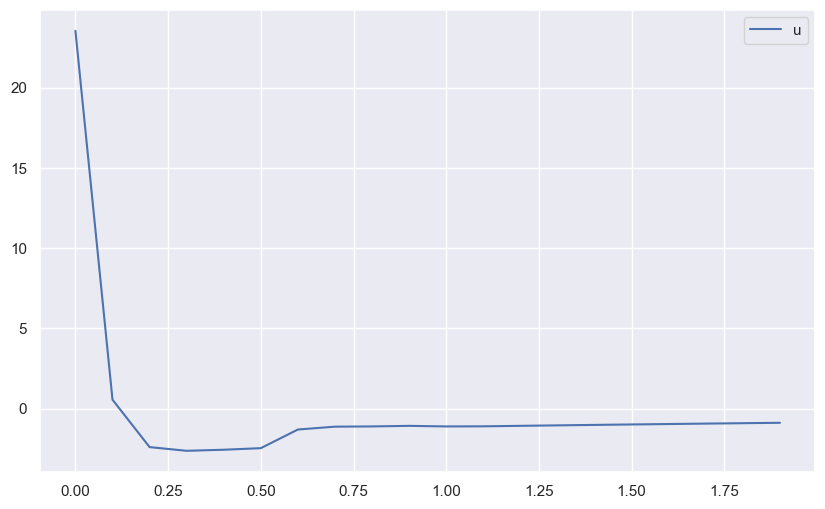

In [260]:
plot_u(env, agent)

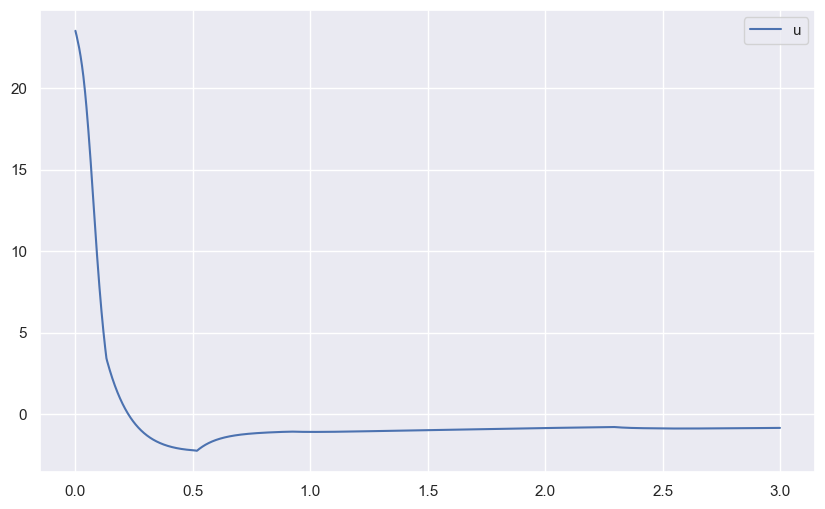

In [261]:
plot_u(validation_env, agent)

-0.9416797261841463 -0.08716594191328782


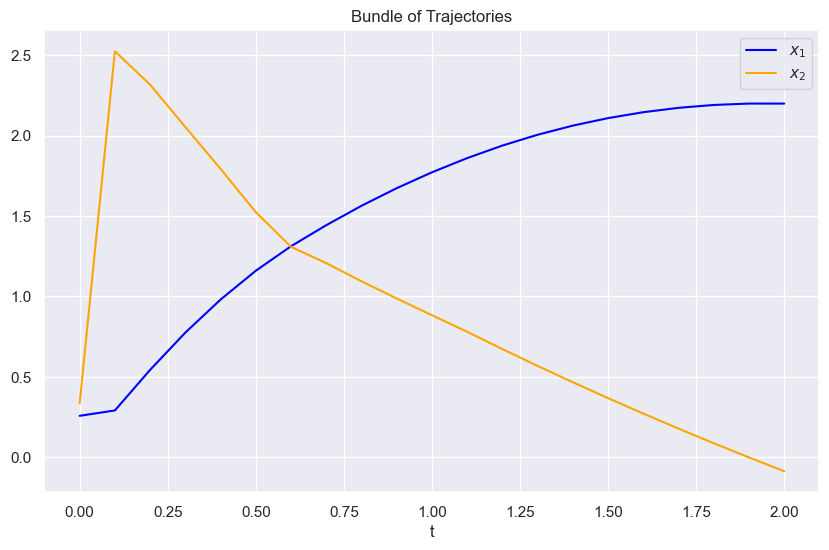

In [262]:
plot_sheaf(env, agent, 1)

-1.1159840919547763 -0.039026796817779694


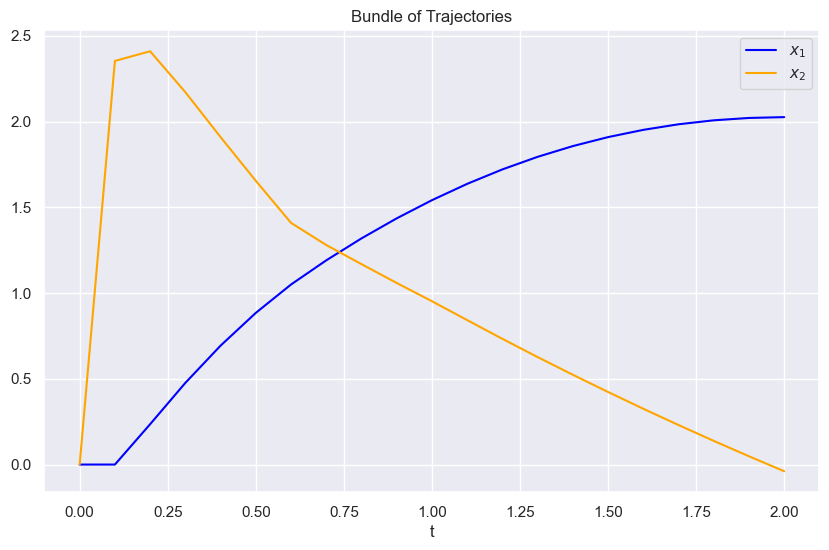

In [263]:
plot_sheaf(env, agent, 1, np.array([0, 0, 0]))

In [146]:
# torch.save(agent.pi_model, 'models/flat_orientation_pi_135.pth')
# torch.save(agent.v_model, 'models/flat_orientation_v_135.pth')